# Data Science Challenge

In [2]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [3]:
# check scikit tool boxes
!pip list | grep scikit*

zsh:1: no matches found: scikit*
ERROR: Pipe to stdout was broken


In [4]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Data Description


Column | Description
:---|:---
`client_id` | Unique ID of the client called [unique key]
`age_bracket` | Age bracket of the contacted client (in years)
`job` | job type of the contacted client
`marital` | marital status of the contacted client
`education` | highest level of education done by the client
`has_housing_loan` | Whether the client has a house loan (binary: yes,no)
`has_personal_loan` | Whether the client has a personal loan (binary: yes,no)
`prev_call_duration` | last contact duration (value = 0 if the client has not been contacted ever)
`days_since_last_call` | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
`num_contacts_prev` | number of contacts performed before this campaign and for this client (numeric)
`poutcome` | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
`contact_date` | date at which contact was made with the client (YYYY-MM-DD)
`cpi` | standing consumer price index before the call (monthly indicator)
`subs_deposit` | has the client subscribed to a term deposit? (binary: 1,0) [dependent variable]

## Data Wrangling & Visualization

### Preview the Samples to Identify the DataTypes 

In [5]:
# Loading Train data

data_filepath = 'train.csv'

df_review = pd.read_csv(data_filepath, nrows=10)
display(df_review.head(5).T)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [55]:
df_review.columns.values

array(['client_id', 'age_bracket', 'job', 'marital', 'education',
       'has_housing_loan', 'has_personal_loan', 'prev_call_duration',
       'days_since_last_call', 'num_contacts_prev', 'poutcome',
       'contact_date', 'cpi', 'subs_deposit'], dtype=object)

Base one the observation, the raw sample contains three group of the features.

- ID: client_id
- Categorical: 
    1. 'age_bracket', 
    2. 'job', 
    3. 'marital', 
    4. 'education', 
    5. 'has_housing_loan', 
    6. 'has_personal_loan',  
    7. 'subs_deposit', (**Target**)
    8. 'poutcome'
- Numerical:
    9.  'prev_call_duration',
    10. 'days_since_last_call', 
    11. 'num_contacts_prev', 
    12. 'cpi'
- Datetime:
    13. 'contact_date'


### Read the Raw Data to Profiling

Now, read the data with data type and parse the data to get the data in the right format.

In [56]:
sample_type = {
    'client_id': 'str',
 'age_bracket': 'str',
 'job': 'str',
 'marital': 'str',
 'education': 'str',
 'has_housing_loan': 'str',
 'has_personal_loan': 'str',
 'prev_call_duration': 'int', # ! check the maximum value
 'days_since_last_call': 'int', # ! check the maximum value
 'num_contacts_prev':'int', # ! check the maximum value
 'poutcome': 'str',
 'contact_date': 'str',
 'cpi': 'float',
 'subs_deposit':'int', # ! check the binary, this could be the target label.
}

df_raw = pd.read_csv(data_filepath, dtype=sample_type, parse_dates=['contact_date'], infer_datetime_format=True)
df_raw.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
client_id,4000,4000,10938,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_bracket,4000,4,25-40,2161,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,4000,7,white-collar,1366,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4000,4,married,2374,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4000,6,bachelors,1274,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_housing_loan,4000,3,yes,2115,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_personal_loan,4000,3,no,3335,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prev_call_duration,4000,NaN,NaN,NaN,NaT,NaT,3871.14,26080.5,2,131,237,461,419900
days_since_last_call,4000,NaN,NaN,NaN,NaT,NaT,903.151,293.324,0,999,999,999,999
num_contacts_prev,4000,NaN,NaN,NaN,NaT,NaT,0.272,0.643132,0,0,0,0,6


In [57]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
client_id               4000 non-null object
age_bracket             4000 non-null object
job                     4000 non-null object
marital                 4000 non-null object
education               4000 non-null object
has_housing_loan        4000 non-null object
has_personal_loan       4000 non-null object
prev_call_duration      4000 non-null int64
days_since_last_call    4000 non-null int64
num_contacts_prev       4000 non-null int64
poutcome                4000 non-null object
contact_date            4000 non-null datetime64[ns]
cpi                     4000 non-null float64
subs_deposit            4000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 437.6+ KB


#### Check 'client_id'

In [58]:
# is the ID unique ?
assert len(df_raw.client_id.unique())== df_raw.shape[0], 'client id is not unique!'

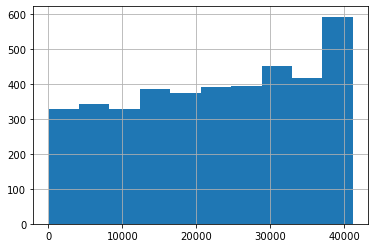

In [59]:
# check the ID distribution
df_temp = df_raw.client_id.astype('float')
ax = df_temp.hist()

In [61]:
# id is good, make a copy of the raw data and set client_id as index
df_data = df_raw.copy() # make sure the raw data is ready for cross-reference.
df_data.set_index('client_id', inplace=True)


### Category Features
Categorical feature needs to be encoded.
#### age_bracket

In [62]:
df_raw.age_bracket.value_counts(), df_raw.age_bracket.unique()

(25-40    2161
 41-60    1544
 18-24     148
 60+       147
 Name: age_bracket, dtype: int64,
 array(['41-60', '60+', '25-40', '18-24'], dtype=object))

In [64]:
# check to see if there is nan
df_raw.age_bracket.value_counts().sum()

4000

#### job

In [66]:
df_raw.job.value_counts().sort_values(ascending=False)

white-collar     1366
blue-collar       769
technician        640
other             503
pink-collar       455
self-employed     153
entrepreneur      114
Name: job, dtype: int64

In [67]:
df_raw.job.value_counts().sum()

4000

#### marital

In [71]:
df_raw.marital.value_counts(), df_raw.job.value_counts().sum() 

(married     2374
 single      1176
 divorced     442
 unknown        8
 Name: marital, dtype: int64,
 4000)

#### education

In [72]:
df_raw.education.value_counts(), df_raw.education.value_counts().sum()

(bachelors           1274
 secondary           1114
 senior_secondary     908
 masters              524
 unknown              176
 illiterate             4
 Name: education, dtype: int64,
 4000)

In [73]:
# has_housing_loan  
df_raw.has_housing_loan.value_counts(),df_raw.has_housing_loan.value_counts().sum()

(yes        2115
 no         1793
 unknown      92
 Name: has_housing_loan, dtype: int64,
 4000)

In [74]:
# has_personal_loan
df_raw.has_personal_loan.value_counts(),df_raw.has_personal_loan.value_counts().sum()

(no         3335
 yes         573
 unknown      92
 Name: has_personal_loan, dtype: int64,
 4000)

In [75]:
# poutcome
df_raw.poutcome.value_counts(), df_raw.poutcome.value_counts().sum()

(nonexistent    3219
 failure         419
 success         362
 Name: poutcome, dtype: int64,
 4000)

In [76]:
df_raw.subs_deposit.value_counts(), df_raw.subs_deposit.value_counts().sum()

(0    2410
 1    1590
 Name: subs_deposit, dtype: int64,
 4000)

### Contact Date
Time is very important which can affect people's decision making due to other factors, such as holiday, news, weather, etc.

There are 50 unique date in the contact_date feature.

The year is 2018. Thus the month, day, weekday can be more useful for modelling.

If we can tell which month/week/day people want to save or spend money, this is a good feature.

Unique Datetime: 50


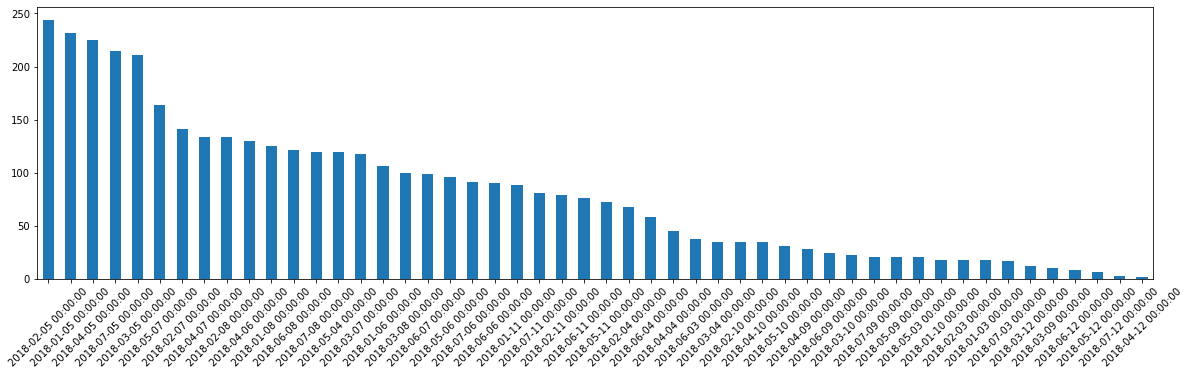

In [79]:
print('Unique Datetime: {}'.format(len(df_raw.contact_date.unique())))
ax = df_raw.sort_values(by='contact_date').contact_date.value_counts().plot(kind='bar', figsize=(20,5), rot=45)

In [83]:
# leave the df_raw as it is.
# modify the df_data to add more time related features.
df_data['contact_month'] = df_data.contact_date.dt.month
df_data['contact_day'] = df_data.contact_date.dt.day
# we could also find the more granular features, like week and weekday
df_data['contact_week'] = df_data.contact_date.dt.week  
# week of the year similar to the month but with more granularity
# we also care about people's mode on different days, 
# for example, people who contacted on sunday, monday, tuesday, etc.
# weekday of the week, 1 is Monday, 7 is Sunday
df_data['contact_weekday'] = df_data.contact_date.dt.weekday + 1 
# we can drop the contect_date for modelling, all the time feature are now categoiral.

In [84]:
df_data

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit,contact_month,contact_day,contact_week,contact_weekday
client_id,,,,,,,,,,,,,,,,,
41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1,7,9,28,1
23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1,5,7,19,1
29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1,1,8,2,1
36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0,2,11,6,7
38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,2018-04-04,93.075,1,4,4,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,41-60,entrepreneur,single,secondary,yes,no,396,999,0,nonexistent,2018-02-05,92.893,1,2,5,6,1
29822,41-60,white-collar,married,bachelors,yes,no,115,999,0,nonexistent,2018-01-08,93.444,0,1,8,2,1
24462,25-40,white-collar,married,senior_secondary,yes,no,214,999,0,nonexistent,2018-06-07,93.918,0,6,7,23,4


### Numeric Features

#### prev_call_duration

In [85]:
df_raw.prev_call_duration.describe()

count      4000.000000
mean       3871.142250
std       26080.549053
min           2.000000
25%         131.000000
50%         237.000000
75%         461.000000
max      419900.000000
Name: prev_call_duration, dtype: float64

<font color='red'> The prev_call_duration mean value (3871.14) is far away from the median value (237.00). 
There may be outlier in this feature. </font>

In [86]:
# compute the upper bound based on the IQR
q1 = df_raw.prev_call_duration.quantile(0.25)
q3 = df_raw.prev_call_duration.quantile(0.75)
iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(f' upper_bound: {upper_bound}')

 upper_bound: 956.0


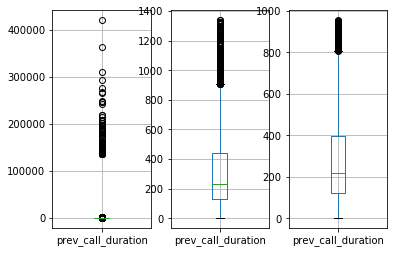

In [88]:
# check the data
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
df_raw.boxplot(column='prev_call_duration')
plt.subplot(1,3,2)
df_raw[df_raw.prev_call_duration < 100000].boxplot(column='prev_call_duration')
plt.subplot(1,3,3)
df_raw[df_raw.prev_call_duration < upper_bound].boxplot(
    column='prev_call_duration')
plt.show()

In [94]:
df_raw[df_raw.prev_call_duration>100000].shape[0]

79

In [102]:
print( '{} seconds means {:4f} hours or {:4f} days'.format(419900, 419900/60/60, 419900/60/60/24))

419900 seconds means 116.638889 hours or 4.859954 days


Base on observation, there are too many outliers in this feature.
700 seconds is about 12 mins, which is a reasonable value.
Even, 1400 seconds is about 24 mins, which is also a reasonable value.
But, >100000 seconds is not reasonable.
We may consider to drop this feature or remove those samples.

**Note**: <font color='red'>I guess these >100000 seconds records is 100 times larger than its real value. We find 79 records of this feature.
    
For example, the value 419900.000000 should be 4199.00.

</font>

#### days_since_last_call

We know that the 999 means client was not previously contacted.

In [103]:
df_raw.days_since_last_call.describe()

count    4000.000000
mean      903.150750
std       293.323535
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: days_since_last_call, dtype: float64

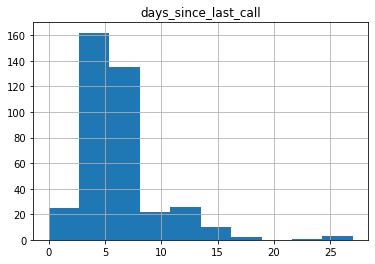

In [117]:
upper_bound = 999
ax = df_raw[df_raw.days_since_last_call < upper_bound].hist(
    column='days_since_last_call')

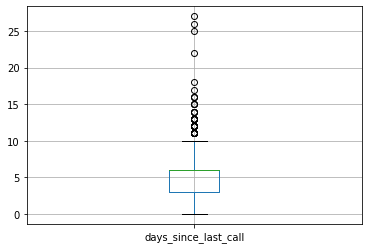

In [118]:
# check data distribution
ax = df_raw[df_raw.days_since_last_call < upper_bound].boxplot(
    column='days_since_last_call')

In [119]:
df_raw[df_raw.days_since_last_call == 999].shape[0]

3614

Value '999' is not a good number to indicate the client has not been contacted, it should be transform to a negtive value like (-1), there is high chance this feature does not fit the guassion distribution, protentially it can be converted inot a categorical data. Because there are too many samples.
If we use tree-based model this feature maynot affect the model performance. But it will hurt MLP and other models based on numerical values.


#### num_contact_prev

In [120]:
df_raw.num_contacts_prev.value_counts(), df_raw.num_contacts_prev.value_counts().sum()

(0    3219
 1     567
 2     144
 3      54
 4      10
 5       5
 6       1
 Name: num_contacts_prev, dtype: int64,
 4000)

In [122]:
# quick statistic analysis
df_phonecall_analysis = df_raw.copy()
df_phonecall = df_phonecall_analysis.num_contacts_prev.value_counts().to_frame(
    'num_contacts_prev')
df_phonecall[
    'cumsum_num_contacts_prev'] = df_phonecall.num_contacts_prev.cumsum()
df_phonecall[
    'ratio'] = df_phonecall.cumsum_num_contacts_prev / df_phonecall.num_contacts_prev.sum(
    )
df_phonecall

,num_contacts_prev,cumsum_num_contacts_prev,ratio
0,3219,3219,0.80475
1,567,3786,0.94650
2,144,3930,0.98250
3,54,3984,0.99600
4,10,3994,0.99850
5,5,3999,0.99975
6,1,4000,1.00000


This feature also show there are a lot of clients are not been contacted before.

80% percent clients are not been contacted.


#### Does the phone call really works ?

In [123]:
df_callwork = df_raw.groupby(by = ['num_contacts_prev','subs_deposit']).client_id.count().to_frame('client count')
df_callwork_sum = df_raw.groupby(by=['num_contacts_prev',
                                 ]).client_id.count().to_frame('sum of call work')
df_callwork_ratio = df_raw.groupby(
    by=['num_contacts_prev']).subs_deposit.value_counts(
        normalize=True).to_frame('client_ratio')
df_callwork['client_ratio'] = df_callwork_ratio.client_ratio
df_callwork

client count  client_ratio
num_contacts_prev subs_deposit                            
0                 0                     2136      0.663560
                  1                     1083      0.336440
1                 0                      233      0.410935
                  1                      334      0.589065
2                 0                       33      0.229167
                  1                      111      0.770833
3                 0                        5      0.092593
                  1                       49      0.907407
4                 0                        2      0.200000
                  1                        8      0.800000
5                 0                        1      0.200000
                  1                        4      0.800000
6                 1                        1      1.000000

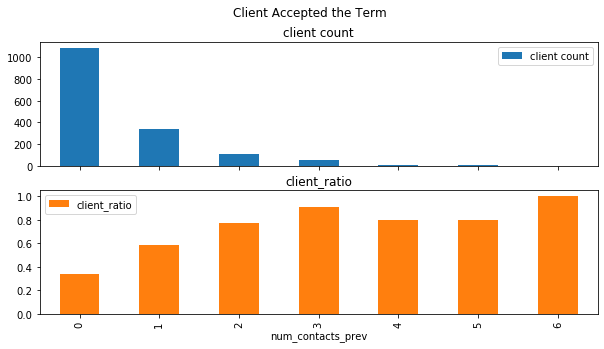

In [124]:
df_temp = df_callwork.copy().reset_index()
df_temp = df_temp[df_temp.subs_deposit == 1]
ax = df_temp.plot(x='num_contacts_prev',
             y=['client count', 'client_ratio'],
             kind='bar',
             subplots=True,
             figsize=(10, 5),
             title='Client Accepted the Term')


<font color='green'> We see the clients who had more phonecalls will be more likely to subscribe the service </font>

In [125]:
# Add a binary feature for the client being contacted
df_phonecall_analysis['contacted'] = df_phonecall_analysis.num_contacts_prev.apply(lambda x: 1 if x > 0 else 0)
df_callwork = df_phonecall_analysis.groupby(
    by=['contacted', 'subs_deposit']).client_id.count().to_frame(
        'client count')
df_callwork_sum = df_phonecall_analysis.groupby(by=[
    'contacted',
]).client_id.count().to_frame('sum of call work')
df_callwork_ratio = df_phonecall_analysis.groupby(
    by=['contacted']).subs_deposit.value_counts(
        normalize=True).to_frame('client_ratio')
df_callwork['client_ratio'] = df_callwork_ratio.client_ratio
df_callwork

client count  client_ratio
contacted subs_deposit                            
0         0                     2136      0.663560
          1                     1083      0.336440
1         0                      274      0.350832
          1                      507      0.649168

<font color='green'> Phonecall can boost the subsription ratio from 33% to 64%.
</font>

<font color='red'> 
Meanwhile, this also tells that even without contact, 33% of the clinets may still use the subscription. 
</font>

#### cpi
standing consumer price index before the call (monthly indicator)

In [126]:
df_raw.cpi.describe()

count    4000.000000
mean      107.348378
std       107.885469
min        92.201000
25%        92.963000
50%        93.444000
75%        93.994000
max       947.670000
Name: cpi, dtype: float64

 upper_bound: 95.54050000000001


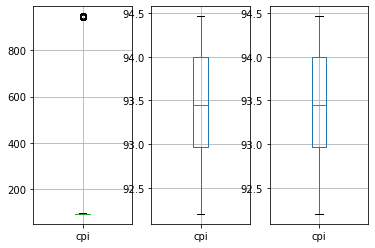

In [127]:
plt.subplot(1, 3, 1)
df_raw.boxplot(column='cpi')
plt.subplot(1, 3, 2)
df_raw[df_raw.cpi < 200].boxplot(
    column='cpi')

q1 = df_raw.cpi.quantile(0.25)
q3 = df_raw.cpi.quantile(0.75)
iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f' upper_bound: {upper_bound}')
plt.subplot(1, 3, 3)
df_raw[df_raw.cpi < upper_bound].boxplot(
    column='cpi')
plt.show()

In [128]:
df_raw[df_raw.cpi>100].shape[0]

65

Clearly, we call tell there are 'errors' in the data.

We see most of the data is records is in xx.xxx format. 

But the cpi>100 shows that the data is not correct but in xxx.xx format.

**Note** 
<font color='red'>
Reason for the error: the cpi is not in the right format. The point is in the wrong position.
    
For example, 947.670000 should be 94.767.
    
Possible solution is: $ cpi/10$, where $cpi>100$
There are 65 samples have this issues.
</font>    

## Feature Engineering and Data Selection

Based on the data profling results, we can create a funtion to convert the raw data to the 'normalised' format.

In [173]:
# this cell should be an python module.
import pandas as pd
from datetime import datetime
import re

def age_bracket_encoder(age_bracket):
    age_bracket_to_int_dict = {
        '18-24': 1,
        '25-40': 2,
        '41-60': 3,
        '60+': 4,
    }
    if age_bracket in age_bracket_to_int_dict:
        return age_bracket_to_int_dict[age_bracket]
    else:
        return 2 # assume middle age

def job_encoder(job):
    job_to_int_dict = {
        'white-collar': 1,
        'technician': 2,
        'self-employed': 3,
        'pink-collar': 4,
        'other': 5,
        'entrepreneur': 6,
        'blue-collar': 7
    }
    if job in job_to_int_dict:
        return job_to_int_dict[job]
    else:
        return 5 # return others if we don't know

marital_type_dict = {'married': 1, 'single': 2, 'divorced': 3, 'unknown': 4}

education_to_int_dict = {
    'bachelors': 1,
    'secondary': 2,
    'senior_secondary': 3,
    'masters': 4,
    'unknown': 5,
    'illiterate': 6
}

loan_type_dict = {'yes': 1, 'no': 0, 'unknown': 2}
poutcome_type_dict = {'success': 1, 'failure': 0, 'nonexistent': 2}


def convert_sample(sample):
    new_sample = {}
    for key in sample.keys():
        if key == 'client_id':
            new_sample[key] = sample[key]
        if key == 'age_bracket':
            new_sample[key] = age_bracket_encoder(sample[key])
        if key == 'job':
            new_sample[key] = job_encoder(sample[key])
        if key == 'marital':
            new_sample[key] = marital_type_dict[sample[key]]
        if key == 'education':
            new_sample[key] = education_to_int_dict[sample[key]]
        if key == 'has_housing_loan':
            new_sample[key] = loan_type_dict[sample[key]]
        if key == 'has_personal_loan':
            new_sample[key] = loan_type_dict[sample[key]]
        if key == 'poutcome': # not used
            new_sample[key] = poutcome_type_dict[sample[key]]
        if key == 'prev_call_duration':
            value = int(sample[key])
            new_sample[key] = value if value < 100000 else 99999 # set upper bound 
        if key == 'days_since_last_call':
            value = int(sample[key])
            new_sample[key] = value if value !=999 else -1 

        if key == 'num_contacts_prev':
            value = int(sample[key])
            new_sample[key] = value if value < 10 else 10

        if key == 'cpi':
            value = float(sample[key])
            new_sample[key] = value if value < 100 else 100

        if key == 'contact_date':
            contact_data_fmt =  check_date_format(sample[key])    
            new_sample['contact_weekday'] =  contact_data_fmt.isoweekday()
            # https://docs.python.org/3/library/datetime.html#datetime.date.isoweekday
    return new_sample

def check_date_format(date_str):
    # check if date is in the format dd/mm/yy 
    date_str= str(date_str)
    # Enforce date format check
    # 
    fmt_type_a = '^[0-3][0-9]\/[0-1][0-9]\/[0-9]{2}$' # '%d/%m/%y'
    fmt_type_b = '^[0-9]{4}-[0-1][0-9]-[0-3][0-9]$'# '%Y-%m-%d'
    fmt_type_c = '^[0-9]{4}-[0-1][0-9]-[0-3][0-9] [0-2][0-9]:[0-5][0-9]:[0-5][0-9]$'# %Y-%m-%d %H:%M:%S'
    # print(date_str)
    if re.match(fmt_type_a, date_str) is not None:
        data_fmt = datetime.strptime(date_str, '%d/%m/%y')
        return data_fmt
    if re.match(fmt_type_b, date_str) is not None:
        data_fmt = datetime.strptime(date_str, '%Y-%m-%d')
        return data_fmt
    if re.match(fmt_type_c, date_str) is not None:
        data_fmt = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        return data_fmt
    # if date_str is not in the format, return Today to avoid error    
    return datetime.now().strftime('%Y-%m-%d')


def data_preprocessing(data_filepath):
    sample_type = {
     'client_id': 'str',
     'age_bracket': 'str',
     'job': 'str',
     'marital': 'str',
     'education': 'str',
     'has_housing_loan': 'str',
     'has_personal_loan': 'str',
     'prev_call_duration': 'int',  
     'days_since_last_call': 'int',  
     'num_contacts_prev':'int',  
     'poutcome': 'str',
     'contact_date': 'str',
     'cpi': 'float',
     'subs_deposit':'int'
    }
    
    # read the data
    df_raw = pd.read_csv(data_filepath, dtype=sample_type, parse_dates=['contact_date'])
    # apply the changes
    df_data= pd.DataFrame(df_raw.apply(lambda x: convert_sample(x), axis=1).to_list())
    
    df_data.set_index('client_id', inplace=True)
    if 'subs_deposit' in df_raw.columns.values: # just for training data
        df_raw.set_index('client_id', inplace=True)
        df_data['subs_deposit'] = df_raw.subs_deposit
    
    return df_data


data_filepath = 'train.csv'
df_train = data_preprocessing(data_filepath)

In [174]:
df_train.head().T

client_id,41020,23720,29378,36636,38229
age_bracket,3.000,4.000,3.000,2.0,1.000
job,1.000,5.000,1.000,2.0,1.000
marital,3.000,3.000,1.000,2.0,2.000
education,1.000,2.000,1.000,3.0,1.000
has_housing_loan,1.000,0.000,0.000,1.0,0.000
has_personal_loan,0.000,1.000,0.000,1.0,0.000
prev_call_duration,283.000,169.000,552.000,206.0,341.000
days_since_last_call,3.000,6.000,-1.000,-1.0,-1.000
num_contacts_prev,1.000,2.000,0.000,0.0,0.000
poutcome,1.000,1.000,2.000,2.0,2.000


In [175]:
df_train.to_csv('df_clean_train.csv') # make a copy

In [176]:
# do the same to the test data
data_filepath = 'test.csv'
df_test = data_preprocessing(data_filepath)
df_test.to_csv('df_clean_test.csv')

In [177]:
df_test.head().T

client_id,19271,36488,2750,4797,29971
age_bracket,2.000,3.0,3.000,2.000,3.000
job,4.000,5.0,1.000,1.000,2.000
marital,1.000,1.0,1.000,2.000,1.000
education,3.000,2.0,2.000,3.000,4.000
has_housing_loan,0.000,0.0,1.000,0.000,1.000
has_personal_loan,0.000,0.0,0.000,0.000,0.000
prev_call_duration,99999.000,597.0,358.000,197.000,210.000
days_since_last_call,-1.000,3.0,-1.000,-1.000,-1.000
num_contacts_prev,0.000,2.0,0.000,1.000,0.000
poutcome,2.000,1.0,2.000,0.000,2.000


## Visualization, Modeling, Machine Learning

Can you help Lending Bank to predict whether a client would subscribe to the term deposit and explain how different features affect that? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of F1 score.**
- **Read the test.csv file and prepare features for testing.**

### Basic Modeling  -  Decision Tree

Due the fact most of the feature are categorical, we will use Decision Tree as base model.

In [178]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [179]:
random_state_seed = 2022 # Just for reproducibility

In [180]:
data = df_train.drop(['subs_deposit'], axis=1).values
target = df_train['subs_deposit'].values
print(data.shape, target.shape)

(4000, 12) (4000,)


Apply cross-validation to find the best_depth of the DT tree.

In [181]:
score_list = []
dt_depth_list = []
cv_score_ave = []
for dt_depth in range(1,25+1):
    model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                    max_depth=dt_depth)
    score = cross_val_score(model_DT, data, target, cv=10)
    score_list.append(score)
    dt_depth_list.append(dt_depth)
    cv_score_ave.append(score.mean())

In [182]:
score_mat = np.stack(score_list, axis=0)
df_score = pd.DataFrame(score_mat,
                        columns=['cv' + str(x) for x in range(1, 10 + 1)])

df_score
df_cv_score = pd.DataFrame({
    'depth': dt_depth_list,
    'cv_score_ave': cv_score_ave,
})
df_cv_score = pd.concat([df_cv_score, df_score], axis=1)
# df_cv_score
df_cv_score.to_csv('df_cv_score_DT.csv')

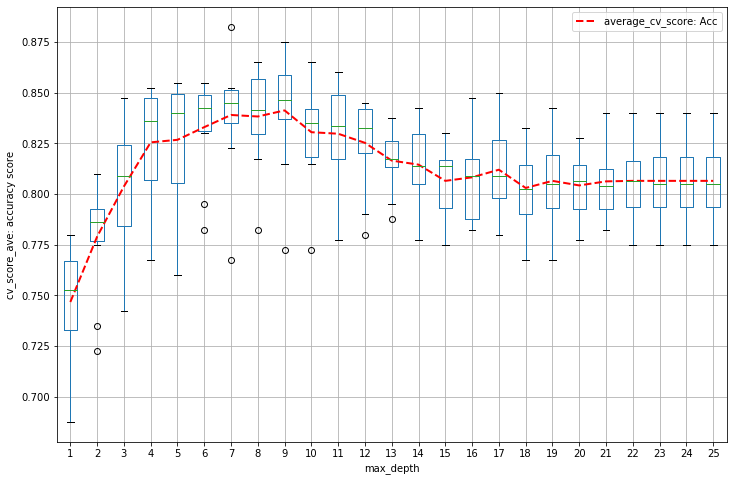

In [183]:
ax = df_score.T.boxplot(figsize=(12, 8))
ax.plot(dt_depth_list, cv_score_ave, 'r--', linewidth=2, label='average_cv_score: Acc')
# ax.xtick(dt_depth_list)
ax.set_xticklabels(dt_depth_list)
ax.set_xlabel('max_depth')
ax.set_ylabel('cv_score_ave: accuracy score')
ax.legend()
# ax.set_ylim([0, 1])
plt.show()

In [187]:
best_depth = df_cv_score[df_cv_score.cv_score_ave == df_cv_score.cv_score_ave.max()].depth.values[0]
print('The best depth of the DT tree is {}'.format(best_depth))

The best depth of the DT tree is 9


In [224]:
from sklearn import tree
from sklearn import metrics
 

model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                  max_depth=best_depth,
                                  criterion='gini')
model_DT.fit(data, target)

y_pred = model_DT.predict(data)
y_prob = model_DT.predict_proba(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))

accuracy: 0.9095
balanced_accuracy_score: 0.9049949111406874
roc_auc_score: 0.9049949111406874
recall_score: 0.8830188679245283
f1_score: 0.8858044164037855
[[2234  176]
 [ 186 1404]]


In [193]:
 # save the model
from joblib import dump, load
dump(model_DT, 'model_DT.joblib')

['model_DT.joblib']



**The bank wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


The DT tree based method to show the results.

In [201]:
feature_names = list(df_train.drop(columns='subs_deposit').columns.values)
# feature_names

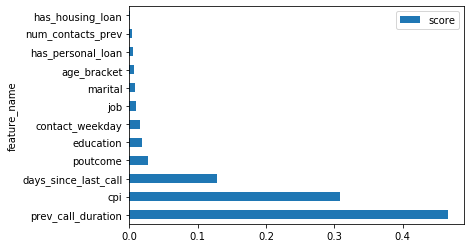

,feature_name,score,cum_score
0,prev_call_duration,0.466646,0.466646
1,cpi,0.308640,0.775285
2,days_since_last_call,0.128815,0.904100
3,poutcome,0.027127,0.931227
4,education,0.017777,0.949004
5,contact_weekday,0.014906,0.963910
6,job,0.010044,0.973954
7,marital,0.008981,0.982935
8,age_bracket,0.006431,0.989366
9,has_personal_loan,0.005252,0.994618


In [204]:
df_feature_importances = pd.DataFrame({'feature_name': feature_names, 'score':model_DT.feature_importances_})
df_feature_importances.sort_values(by='score', ascending=False, inplace=True)
df_feature_importances.reset_index(drop=True, inplace =True)

df_feature_importances['cum_score'] = df_feature_importances.score.cumsum()
ax = df_feature_importances.plot.barh(x='feature_name', y='score')
plt.show()


display(df_feature_importances)

Based on the results, we can find that the Top 3 important features are
- pre_call_duration
- cpi
- days_since_last_call

3 of them taks 90% contribution for the model.


### One More Step on ML: Random Forest 

In [256]:
from sklearn.ensemble import RandomForestClassifier
data = df_train.drop(['subs_deposit'], axis=1).values
target = df_train['subs_deposit'].values
print(data.shape, target.shape)

(4000, 12) (4000,)


In [257]:
score_list = []
tree_num_list = []
cv_score_ave = []

n_estimators_max = 40 # Original setting is 100 

for n in range(1, n_estimators_max+1):
    model_RF = RandomForestClassifier(n_estimators=n,
                                    random_state=random_state_seed,
                                    max_depth=best_depth)
    score = cross_val_score(model_RF, data, target, cv=10)
    score_list.append(score)
    tree_num_list.append(n)
    cv_score_ave.append(score.mean())

In [258]:
score_mat = np.stack(score_list, axis=0)
df_score = pd.DataFrame(score_mat,
                        columns=['cv' + str(x) for x in range(1, 10+1)])

# df_score 
df_cv_score = pd.DataFrame({
    'depth': tree_num_list,
    'cv_score_ave': cv_score_ave,
})
df_cv_score = pd.concat([df_cv_score, df_score], axis=1)
# df_cv_score
df_cv_score.to_csv('df_cv_score_RF.csv')

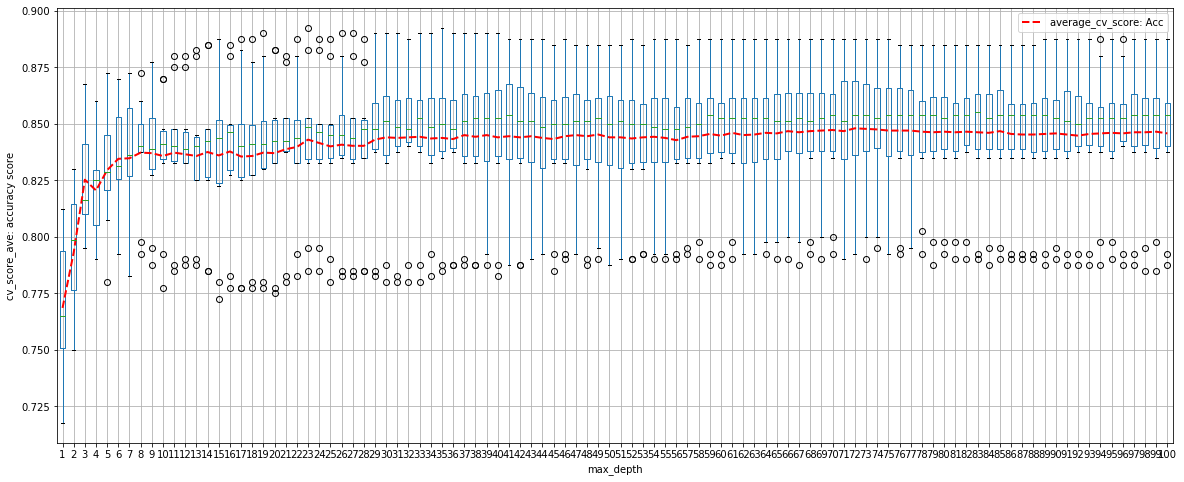

In [259]:
ax = df_score.T.boxplot(figsize=(20, 8))
ax.plot(tree_num_list,
        cv_score_ave,
        'r--',
        linewidth=2,
        label='average_cv_score: Acc')
# ax.xtick(tree_num_list)
ax.set_xticklabels(tree_num_list)
ax.set_xlabel('max_depth')
ax.set_ylabel('cv_score_ave: accuracy score')
ax.legend()
# ax.set_ylim([0, 1])
plt.show()

In [260]:
best_n = df_cv_score[df_cv_score['cv_score_ave'] == df_cv_score['cv_score_ave'].max()].depth.values[0]

In [261]:
print('RF model has {} DT Tree with depth {}'.format(best_n, best_depth))

RF model has 72 DT Tree with depth 9


In [262]:
model_RF = RandomForestClassifier(n_estimators=best_n,
                                  max_depth=best_depth)
model_RF.fit(data, target)

y_pred = model_RF.predict(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))
dump(model_RF, 'model_RF.joblib')

accuracy: 0.89725
balanced_accuracy_score: 0.8893721130509669
roc_auc_score: 0.889372113050967
recall_score: 0.8509433962264151
f1_score: 0.8681424446583254
[[2236  174]
 [ 237 1353]]


['model_RF.joblib']

#### Comparing DT and RF model

Base on the above results, we find the training performance as follows:

 |- | DT | RF | 
 | -------- |------ |------ |
 |accuracy: |0.9095 |0.8972 |
 |f1_score: |0.8858 |0.8681 | 
 
 
 Again more advanced model can be applied with different approaches, like gradient boosted tree model.
 
 But the feature engineering and sample selection are the most important for the ML modelling.


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the Test set (test.csv), you must predict the 'subs_deposit' variable (1/0). The 1/0 would depend on the **best F1 score**.
    You should submit a CSV file with test entries plus a header row. Your submission will show an error if you have extra columns beyond 'client_id' and 'subs_deposit' or extra rows.
The file (`submission.csv`) should have exactly 2 columns:
    - **client_id**
    - **subs_deposit** (contains 1/0)

In [240]:
df_test.head().T

client_id,19271,36488,2750,4797,29971
age_bracket,2.000,3.0,3.000,2.000,3.000
job,4.000,5.0,1.000,1.000,2.000
marital,1.000,1.0,1.000,2.000,1.000
education,3.000,2.0,2.000,3.000,4.000
has_housing_loan,0.000,0.0,1.000,0.000,1.000
has_personal_loan,0.000,0.0,0.000,0.000,0.000
prev_call_duration,99999.000,597.0,358.000,197.000,210.000
days_since_last_call,-1.000,3.0,-1.000,-1.000,-1.000
num_contacts_prev,0.000,2.0,0.000,1.000,0.000
poutcome,2.000,1.0,2.000,0.000,2.000


In [241]:
Xt = df_test.values
print(Xt.shape)


(1000, 12)


In [242]:
y_pred = model_RF.predict(Xt)

In [283]:
# df_test.index

In [244]:
data_sub = pd.DataFrame()
data_sub['clinet_id'] = df_test.index
data_sub['subs_deposit']= y_pred

In [245]:
data_sub.head()

,clinet_id,subs_deposit
0,19271,1
1,36488,1
2,2750,0
3,4797,0
4,29971,0


In [246]:
#Submission
data_sub.to_csv('submissions.csv',index=False)

### AutoML Approach (Looks like this Python 3.7 is incompatible)


In [268]:
# import sys
# !{sys.executable} -m pip install -q autogluon==0.3.0

```
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

transformers 4.16.2 requires tokenizers!=0.11.3,>=0.10.1, but you'll have tokenizers 0.9.4 which is incompatible.
```

<font color='green'>The HackerRank Environment does not support the most recent packages I need, thus here is a running leaderboard from my local machine.</font>

In [271]:
df=pd.read_csv('df_leaderboard.csv')
display(df)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.918071,0.894,0.017220,0.004336,0.360453,0.017220,0.004336,0.360453,1,True,4
1,WeightedEnsemble_L2,0.918071,0.894,0.031053,0.005443,0.764001,0.013833,0.001107,0.403548,2,True,14
2,XGBoost,0.960073,0.892,0.013635,0.005324,0.543825,0.013635,0.005324,0.543825,1,True,11
3,CatBoost,0.903033,0.890,0.003097,0.001884,0.740376,0.003097,0.001884,0.740376,1,True,7
4,LightGBMLarge,0.935442,0.876,0.007446,0.002962,0.669745,0.007446,0.002962,0.669745,1,True,13
5,RandomForestGini,0.982888,0.868,0.114401,0.044079,0.452505,0.114401,0.044079,0.452505,1,True,5
6,RandomForestEntr,0.982370,0.864,0.086212,0.043229,0.442688,0.086212,0.043229,0.442688,1,True,6
7,LightGBMXT,0.880996,0.864,0.023965,0.004307,0.948602,0.023965,0.004307,0.948602,1,True,3
8,ExtraTreesGini,0.980036,0.846,0.107915,0.042035,0.422966,0.107915,0.042035,0.422966,1,True,8
9,ExtraTreesEntr,0.979777,0.844,0.104916,0.042172,0.426081,0.104916,0.042172,0.426081,1,True,9


We can see most of the Tree-based model get better valication scores around 0.89.

Thus, the DT tree model can provide a simple solution for this tasks.


### END